# Neural Networks


Recreation of Andrew Ng Octave course 
using Python Jupyter Notebook by Alek Zdziarski

In [158]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25 # 25 hidden units
num_labels = 10 # 10 labels, from 0 to 9   

## Part 1: Loading and Visualizing Data

In [160]:
def display_data(s):
    fig, axarr = plt.subplots(nrows=10, ncols=10,figsize=(10,10))    
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(s.shape[0])
            tmp = s[ind,:].reshape(20,20, order='F')
            axarr[i,j].imshow(tmp, cmap='gray_r')
            plt.setp(axarr[i,j].get_xticklabels(), visible=False)
            plt.setp(axarr[i,j].get_yticklabels(), visible=False)
    fig.subplots_adjust(hspace=0, wspace=0)    

Loading and Visualizing Data ...


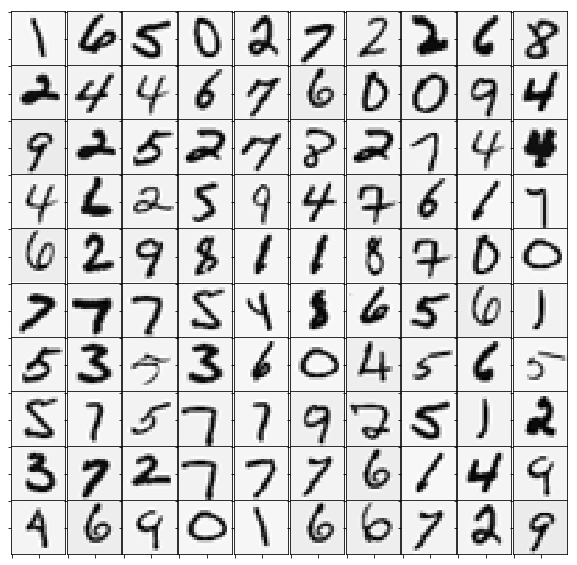

In [161]:
# Load Training Data
print('Loading and Visualizing Data ...')

# import csv data
PATH="/Users/alek/OneDrive/Projects/Courses/Machine Learning Andrew Ng, Stanford, Coursera/ex3 Multiclass Classification and Neural Nets/ex3/"
DATA="ex3data1.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']
y = mat['y']

#convert 10s to 0s as python is 0 indexed so this will be preferred. Decided to leave as is
#tenrows = np.where(y==10)
#y[tenrows]=0

m = X.shape[0]

# Randomly select 100 data points to display
sel = np.random.choice(m,100,replace=False)

display_data(X[sel, :])



## Part 2: Loading Pameters

In [162]:
print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
DATA="ex3weights.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y

Theta1 = mat['Theta1']
Theta2 = mat['Theta2']


Loading Saved Neural Network Parameters ...



## Part 3: Implement Predict

In [163]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

def predict(Theta1, Theta2, X):
#PREDICT Predict the label of an input given a trained neural network
#   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
#   trained weights of a neural network (Theta1, Theta2)

    # Useful values
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    # You need to return the following variables correctly
    p = np.zeros((X.shape[0], 1))
    # create a1 by adding one's to the X features
    a1 = np.c_[np.ones((m, 1)), X]
    a1_theta1 = a1 @ Theta1.T

    a2p = sigmoid (a1_theta1)
    a2 = np.c_[np.ones((a1_theta1.shape[0], 1)), a2p]
    a2_theta2 = a2 @ Theta2.T

    a3 = sigmoid(a2_theta2)

    return a3.max(axis=1), a3.argmax(axis=1).reshape(m,1)+1 #+1 as python is zero indexed, this data set uses 10 to represent 0 at end of the array

In [164]:
def display_data_predictions(y, s, p, prob):
    count = s.shape[0]
    maxcols = 5
    if count > maxcols:
        cols = maxcols
        import math
        rows = math.ceil(count/maxcols)
    else:
        cols = count
        rows = 1

    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(10,10))

    cnt = 0
    for r in range(rows):
        for c in range (cols):
            #print (f'r {r}, c {c}, cnt {cnt}')
            ind = np.random.randint(s.shape[0])
            tmp = s[cnt,:].reshape(20,20, order='F')
            axarr[r,c].imshow(tmp, cmap='gray_r')
            plt.setp(axarr[r,c].get_xticklabels(), visible=False)
            plt.setp(axarr[r,c].get_yticklabels(), visible=False)
            axarr[r,c].set_title(f'{y[cnt][0]} P:{p[cnt][0]} {prob[cnt]:.2f}')
            cnt += 1
            if cnt >= count:
                break
    fig.subplots_adjust(hspace=1, wspace=1) 

Random selection of predictions
Overall training Set Accuracy:  97.52

 The following format shows: [y] P:[Prediction] [Confidence]



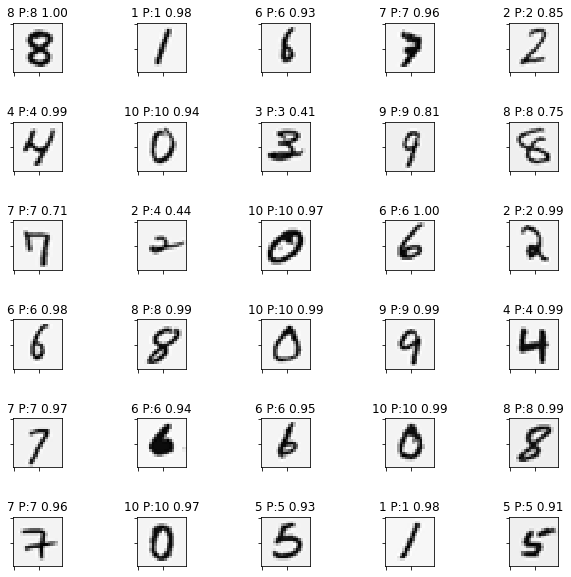

In [165]:
print('Random selection of predictions\nOverall training Set Accuracy: ', np.mean(np.double(pred == y)) * 100)
print ('\n The following format shows: [y] P:[Prediction] [Confidence]\n')

prob, pred = predict(Theta1, Theta2, X)
Theta1.shape, Theta2.shape, X.shape, pred.shape

#  Randomly permute 30 examples
m = X.shape[0]
n = X.shape[1]
rp = np.random.choice(m,30)

display_data_predictions(y[rp], X[rp,:], pred[rp], prob[rp])
